In [13]:
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
errValues = [0.0, 0.01, 0.025, 0.05, 0.1, 0.15, 0.25, 0.30]

def getReals(setNum, numPhi = 45):
    df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
    return df.loc[numPhi * setNum, 'gReH': 'gReHTilde']

def getData(errValues, setNum):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    for err in errValues: 
        #Getting data from the file
        data = pd.read_csv("Predictions\Method2-"+ str(setNum) + "-" + str(err) +  ".csv")
        #Adding the std of each column into an array
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))
        
        # Adding how far away mean of CFFs are to true values
        # ReHMean.append(abs(round(realValues[idx][0] - np.mean(data.ReH), 4)))
        # ReEMean.append(abs(round(realValues[idx][1] - np.mean(data.ReE), 4)))
        # ReHtildeMean.append(abs(round(realValues[idx][2] - np.mean(data.ReHtilde), 4)))

        ReHMean.append(abs(round(np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

def getColorMappingValues(setNum):
    ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, setNum)
    print("Best Fit Lines if ErrF is in Percent")
    x, b = np.polyfit(errValues, ReHMean, 1)
    print("ReH Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReEMean, 1)
    print("ReE Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReHtildeMean, 1)
    print("ReHtilde Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))

def getColorMappingValues(amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        for errF in errValues:
            data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
            
            # NOTE we take max(mean, -1) because if data is more than 100% error it should just cap in terms of heatmapping
            #Inverted because currently smaller values are red and larger values are green
            #Want to make opposite (smaller %error-values = green and larger %error-values = red) therefore we multiply by -1
            ReHMean.append(100 * max(-abs(np.mean(data.ReH)), -1))
            ReEMean.append(100 * max(-abs(np.mean(data.ReE)), -1))
            ReHtildeMean.append(100 * max(-abs(np.mean(data.ReHtilde)), -1))

    return ReHMean, ReEMean, ReHtildeMean  

def getSizes(amountofSets):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        for errF in errValues: 
            data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
            
            ReHMean.append(10 + pow(np.std(data.ReH), 0.75))
            ReEMean.append(10 + pow(np.std(data.ReE), 0.75))
            ReHtildeMean.append(10 + pow(np.std(data.ReHtilde), 0.75))

    return ReHMean, ReEMean, ReHtildeMean

def getColorMappingValuesErrF(amountofSets, errF):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        
        data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
        
        # NOTE we take max(mean, -1) because if data is more than 100% error it should just cap in terms of heatmapping
        #Inverted because currently smaller values are red and larger values are green
        #Want to make opposite (smaller %error-values = green and larger %error-values = red) therefore we multiply by -1
        ReHMean.append(100 * max(-abs(np.mean(data.ReH)), -1))
        ReEMean.append(100 * max(-abs(np.mean(data.ReE)), -1))
        ReHtildeMean.append(100 * max(-abs(np.mean(data.ReHtilde)), -1))

    return ReHMean, ReEMean, ReHtildeMean  

def getSizesErrF(amountofSets, errF):
    ReHMean = []
    ReEMean = []
    ReHtildeMean = []
    for set in range(amountofSets):
        
        data = pd.read_csv("Predictions\Method2-"+ str(set) + "-" + str(errF) +  ".csv")
        
        ReHMean.append(10 + pow(np.std(data.ReH), 0.75))
        ReEMean.append(10 + pow(np.std(data.ReE), 0.75))
        ReHtildeMean.append(10 + pow(np.std(data.ReHtilde), 0.75))

    return ReHMean, ReEMean, ReHtildeMean

#Returns lists that contain the kinematics for each index
def getkinematics(numSets):
    errs = []
    xb = []
    t = []
    for i in range(numSets):
        #gets a set's kinematics
        kvar, Q, x, ts = df.loc[45 * i, 'k': 't']
        
        #adds set's kinematics to running list
        errs.extend(errValues)
        xb.extend([x] * len(errValues))
        t.extend([ts] * len(errValues))
    
    return xb, t, errs

def getkinematicsErrF(numSets):
    xb = []
    t = []
    for i in range(numSets):
        #gets a set's kinematics
        kvar, Q, x, ts = df.loc[45 * i, 'k': 't']
        
        #adds set's kinematics to running list
        xb.append(x)
        t.append(ts)
    
    return xb, t

def plotInteractive(numSets, whichCFF, show = True):
    h, e, tilde = getColorMappingValues(numSets)
    hs, es, tildes = getSizes(numSets)
    xb, t, errs = getkinematics(numSets)


    chosens = []
    chosen = []
    if whichCFF == 'ReH':
        chosens = hs
        chosen = h
    elif whichCFF == 'ReE':
        chosens = es
        chosen = e
    else: 
        chosen = tilde
        chosens = tildes
        whichCFF = 'ReHtilde'

    # Blue means better predictions -- Red --> Worse Predictions
    splot = go.Figure(data=[go.Scatter3d(
        x=xb,
        y=t,
        z=errs,
        mode='markers',
        marker=dict(
            showscale=True,
            cmax=0,
            cmin=-100,
            size=chosens,
            color=chosen,                # set color to an array/list of desired values
            colorscale='RdYlGn',   # choose a colorscale
            opacity=1
        ),
        hovertemplate = "QQ: %{x:.2f}<br>t: %{y:.2f}<br>xb: %{z:.2f}"
    )])

    splot.update_traces
    splot.update_layout(
        title = 'Model Performance on ' + whichCFF + ' with varrying error on F',
        scene = dict(
            xaxis_title='x_b',
            yaxis_title='t',
            zaxis_title='err F',
            aspectmode='cube',
        ),
        template='ggplot2',
        margin=dict(r=0, b=40, l=0, t=50)
    )

    #splot.write_html('Interactive Plots/Acc+Spread_' + whichCFF + 'ErrF.html')

    if show:
        splot.show()

In [14]:
plotInteractive(403, 'ReH')

In [15]:
def plotInteractiveErrF(numSets, whichCFF, errF, show = True):
    h, e, tilde = getColorMappingValuesErrF(numSets, errF)
    hs, es, tildes = getSizesErrF(numSets, errF)
    xb, t = getkinematicsErrF(numSets)


    chosens = []
    chosen = []
    if whichCFF == 'ReH':
        chosens = hs
        chosen = h
    elif whichCFF == 'ReE':
        chosens = es
        chosen = e
    else: 
        chosen = tilde
        chosens = tildes
        whichCFF = 'ReHtilde'

    # Blue means better predictions -- Red --> Worse Predictions
    splot = go.Figure(data=[go.Scatter(
        x=xb,
        y=t,
        mode='markers',
        marker=dict(
            showscale=True,
            cmax=0,
            cmin=-100,
            size=chosens,
            color=chosen,                # set color to an array/list of desired values
            colorscale='RdYlGn',   # choose a colorscale
            opacity=1
        ),
        hovertemplate = "xb: %{x:.2f}<br>t: %{y:.2f}"
    )])

    splot.update_traces
    splot.update_layout(
        title = 'Model Performance on ' + whichCFF + ' with varrying error on F',
        scene = dict(
            xaxis_title='x_b',
            yaxis_title='t',
        ),
        template='ggplot2',
        margin=dict(r=0, b=40, l=0, t=50)
    )

    #splot.write_html('Interactive Plots/Acc+Spread_' + whichCFF + 'ErrF.html')

    if show:
        splot.show()

In [16]:
plotInteractiveErrF(403, 'ReH', 0.25)

In [17]:
def getColorMappingValuesErrFV(amountofSets):
    ReHslope = []
    ReEslope = []
    ReHtildeslope = []
    for set in range(amountofSets):
        ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, set)
        xreh, b = np.polyfit(errValues, ReHMean, 1)
        xree, b = np.polyfit(errValues, ReEMean, 1)
        xrehT, b = np.polyfit(errValues, ReHtildeMean, 1)

        ReHslope.append(-xreh/100)
        ReEslope.append(-xree/100)
        ReHtildeslope.append(-xrehT/100)

    return ReHslope, ReEslope, ReHtildeslope  

In [33]:
def plotInteractiveErrF(numSets, whichCFF, show = True):
    h, e, tilde = getColorMappingValuesErrFV(numSets)
    #hs, es, tildes = getSizesErrF(numSets, errF)
    xb, t = getkinematicsErrF(numSets)


    chosens = []
    chosen = []
    if whichCFF == 'ReH':
        chosen = h
    elif whichCFF == 'ReE':
        chosen = e
    else: 
        chosen = tilde
        whichCFF = 'ReHtilde'

    # Blue means better predictions -- Red --> Worse Predictions
    splot = go.Figure(data=[go.Scatter(
        x=xb,
        y=t,
        mode='markers',
        marker=dict(
            showscale=True,
            cmax=0,
            cmin=-0.1,
            size = 8,
            color=chosen,                # set color to an array/list of desired values
            colorscale='RdYlGn',   # choose a colorscale
            opacity=1
        ),
        hovertemplate = "xb: %{x:.2f}<br>t: %{y:.2f}"
    )])

    splot.update_traces
    splot.update_layout(
        title = 'Model Performance on ' + whichCFF + ' with varrying error on F',
        scene = dict(
            xaxis_title='x_b',
            yaxis_title='t',
        ),
        template='ggplot2',
        margin=dict(r=0, b=40, l=0, t=50)
    )

    #splot.write_html('Interactive Plots/Acc+Spread_' + whichCFF + 'ErrF.html')

    if show:
        splot.show()

In [36]:
plotInteractiveErrF(403, 'ReE')

In [20]:
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
data = DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 45):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'gReH': 'gReHTilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReHtilde, bins = buckets[2])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReH, bins = buckets[0])

    plt.title(str(setNum) + " Distribution")
    plt.legend(["ReHtilde", "ReE", "ReH"])

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500, color = '#1a601b')
    plt.axvline(x=realValues[1], ymin=0, ymax=500, color = '#7f3f07')
    plt.axvline(x=realValues[2], ymin=0, ymax=500, color = '#0c3049')

#Sets of data that I have
sets = list(range(0, 403))
#Getting the real values (from dataset) for those values
realValues = getRealValues(sets, numPhi=45)

def getData(errValues, setNum):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    for err in errValues: 
        #Getting data from the file
        data = pd.read_csv("Predictions\Method2-"+ str(setNum) + "-" + str(err) +  ".csv")
        #Adding the std of each column into an array
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))
        # #Adding how far away mean of CFFs are to true values
        # ReHMean.append(abs(round(realValues[idx][0] - np.mean(data.ReH), 4)))
        # ReEMean.append(abs(round(realValues[idx][1] - np.mean(data.ReE), 4)))
        # ReHtildeMean.append(abs(round(realValues[idx][2] - np.mean(data.ReHtilde), 4)))

        ReHMean.append(abs(round(np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

def plot(errValues, setNum, wantPlots = True):
    ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, setNum)
    print("Best Fit Lines if ErrF is in Percent")
    x, b = np.polyfit(errValues, ReHMean, 1)
    print("ReH Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReEMean, 1)
    print("ReE Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReHtildeMean, 1)
    print("ReHtilde Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))

    if wantPlots: 
        fig, axes = plt.subplots(1, 3)
        fig.suptitle('Set ' + str(setNum + 1))
        axes[0].set_title('ReH')
        axes[0].plot(errValues, ReHMean, 'x')
        axes[0].plot(errValues, ReHSTD, 'o', color = '#1f77b4')
        

        axes[1].plot(errValues, ReEMean, 'x')
        axes[1].plot(errValues, ReESTD, 'o', color = 'orange')
        axes[1].set_title('ReE')

        axes[2].plot(errValues, ReHtildeMean, 'x')
        axes[2].plot(errValues, ReHtildeSTD, 'o', color = 'green')
        axes[2].set_title('ReHtilde')
        
        for ax in axes:
            ax.set(xlabel='errF')

        fig.set_size_inches(18.5, 4.5, forward=True)


Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0034x + 0.5223
ReE Acc Best Fit: 0.0058x + 1.4325
ReHtilde Acc Best Fit: 0.0038x + 0.3663


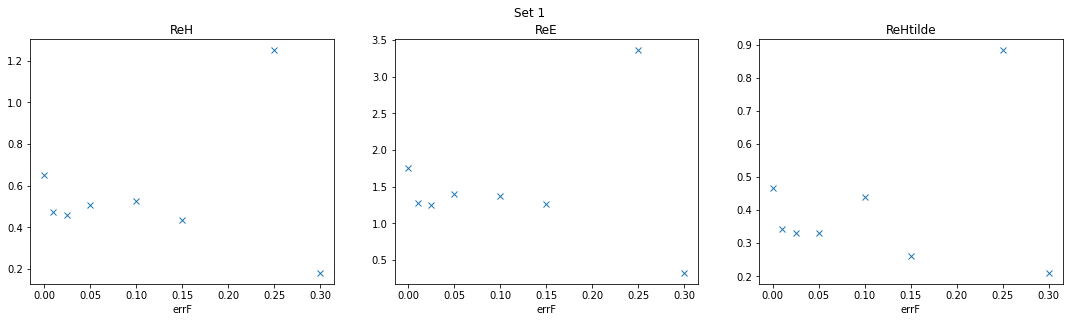

In [27]:
plot(errValues, 0)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0142x + 0.428
ReE Acc Best Fit: 0.0095x + 2.4241
ReHtilde Acc Best Fit: 0.0065x + 0.2245


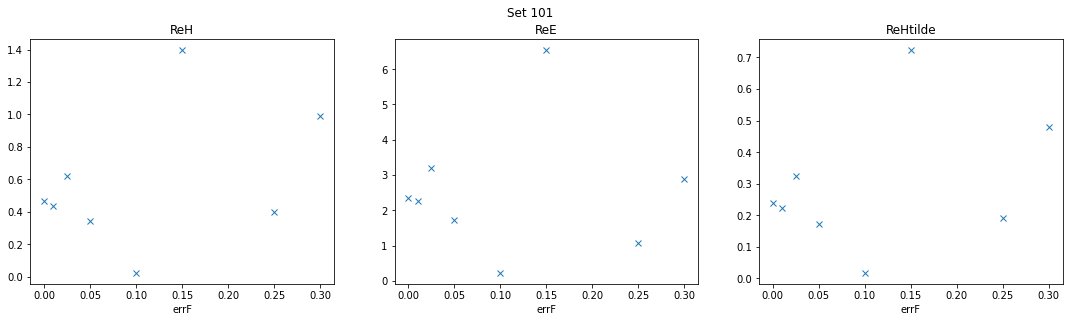

In [28]:
plot(errValues, 100)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.304x + -0.6731
ReE Acc Best Fit: 0.4079x + -1.0907
ReHtilde Acc Best Fit: 0.3565x + -0.8398


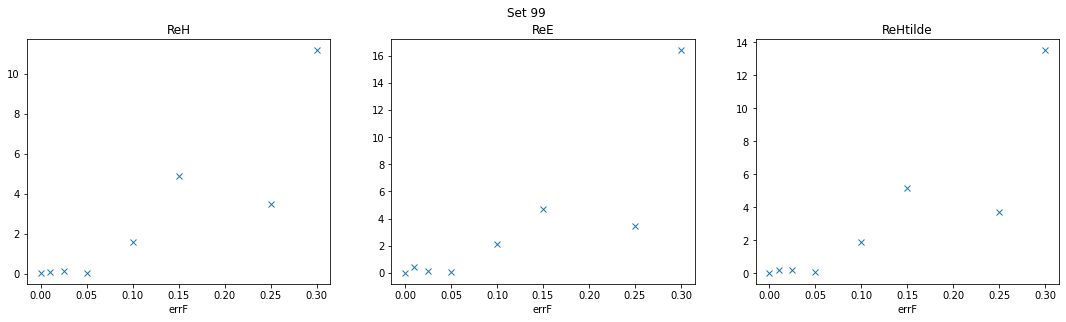

In [29]:
plot(errValues, 98)

Best Fit Lines if ErrF is in Percent
ReH Acc Best Fit: 0.0489x + 0.5536
ReE Acc Best Fit: 0.5619x + -0.0508
ReHtilde Acc Best Fit: 0.0625x + 0.3915


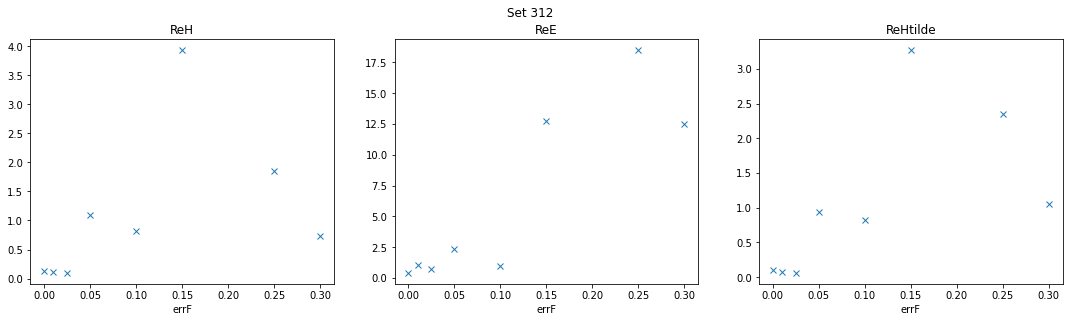

In [26]:
plot(errValues, 311)

In [25]:
from BHDVCS_tf import DvcsData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

df = pd.read_csv("dvcs_bkm_xs_June2021_4pars.csv")
data = DvcsData(df)

#Get real CFF values for Kinematic Sets Chosen
def getRealValues(sets, numPhi = 45):
    realValues = []
    for s in sets: 
        ReH, ReE, ReHtilde = df.loc[numPhi * s, 'gReH': 'gReHTilde']
        realValues.append([ReH, ReE, ReHtilde])

    return realValues

#Calculates mean and std of distribution from model
def calcMeanAndStd(data):
    return [[round(np.mean(data.ReH), 4), round(np.mean(data.ReE), 4), round(np.mean(data.ReHtilde), 4)], [round(np.std(data.ReH), 4), round(np.std(data.ReE), 4), round(np.std(data.ReHtilde), 4)]]

#Plots histogram with distribution and real values for a certain kinematic set
def plotHis(data, realValues, setNum, buckets = [10, 10, 10], sameAxes = True):
    plt.hist(data.ReHtilde, bins = buckets[2])
    plt.hist(data.ReE, bins = buckets[1])
    plt.hist(data.ReH, bins = buckets[0])

    plt.title(str(setNum) + " Distribution")
    plt.legend(["ReHtilde", "ReE", "ReH"])

    if sameAxes: 
        plt.xlim(xmin=-70, xmax = 20)    
    
    plt.axvline(x=realValues[0], ymin=0, ymax=500, color = '#1a601b')
    plt.axvline(x=realValues[1], ymin=0, ymax=500, color = '#7f3f07')
    plt.axvline(x=realValues[2], ymin=0, ymax=500, color = '#0c3049')

#Sets of data that I have
sets = list(range(0, 403))
#Getting the real values (from dataset) for those values
realValues = getRealValues(sets, numPhi=45)

def getData(errValues, setNum):
    ReHSTD = []
    ReESTD = []
    ReHtildeSTD = []

    ReHMean = []
    ReEMean = []
    ReHtildeMean = []

    for err in errValues: 
        #Getting data from the file
        data = pd.read_csv("Predictions\Method2-"+ str(setNum) + "-" + str(err) +  ".csv")
        #Adding the std of each column into an array
        ReHSTD.append(round(np.std(data.ReH), 4))
        ReESTD.append(round(np.std(data.ReE), 4))
        ReHtildeSTD.append(round(np.std(data.ReHtilde), 4))
        # #Adding how far away mean of CFFs are to true values
        # ReHMean.append(abs(round(realValues[idx][0] - np.mean(data.ReH), 4)))
        # ReEMean.append(abs(round(realValues[idx][1] - np.mean(data.ReE), 4)))
        # ReHtildeMean.append(abs(round(realValues[idx][2] - np.mean(data.ReHtilde), 4)))

        ReHMean.append(abs(round(np.mean(data.ReH), 4)))
        ReEMean.append(abs(round(np.mean(data.ReE), 4)))
        ReHtildeMean.append(abs(round(np.mean(data.ReHtilde), 4)))

    return ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean

def plot(errValues, setNum, wantPlots = True):
    ReHSTD, ReESTD, ReHtildeSTD, ReHMean, ReEMean, ReHtildeMean = getData(errValues, setNum)
    print("Best Fit Lines if ErrF is in Percent")
    x, b = np.polyfit(errValues, ReHMean, 1)
    print("ReH Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReEMean, 1)
    print("ReE Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))
    x, b = np.polyfit(errValues, ReHtildeMean, 1)
    print("ReHtilde Acc Best Fit: " + str(round(x/100, 4)) + "x + " + str(round(b, 4)))

    if wantPlots: 
        fig, axes = plt.subplots(1, 3)
        fig.suptitle('Set ' + str(setNum + 1))
        axes[0].set_title('ReH')
        axes[0].plot(errValues, ReHMean, 'x')
        #axes[0].plot(errValues, ReHSTD, 'o', color = '#1f77b4')
        

        axes[1].plot(errValues, ReEMean, 'x')
        #[1].plot(errValues, ReESTD, 'o', color = 'orange')
        axes[1].set_title('ReE')

        axes[2].plot(errValues, ReHtildeMean, 'x')
        #axes[2].plot(errValues, ReHtildeSTD, 'o', color = 'green')
        axes[2].set_title('ReHtilde')
        
        for ax in axes:
            ax.set(xlabel='errF')

        fig.set_size_inches(18.5, 4.5, forward=True)